Epoch 1/2
235/235 ━━━━━━━━━━━━━━━━━━━━ 54s 211ms/step - loss: 0.2797 - val_loss: 0.0914
Epoch 2/2
235/235 ━━━━━━━━━━━━━━━━━━━━ 48s 204ms/step - loss: 0.0886 - val_loss: 0.0816
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


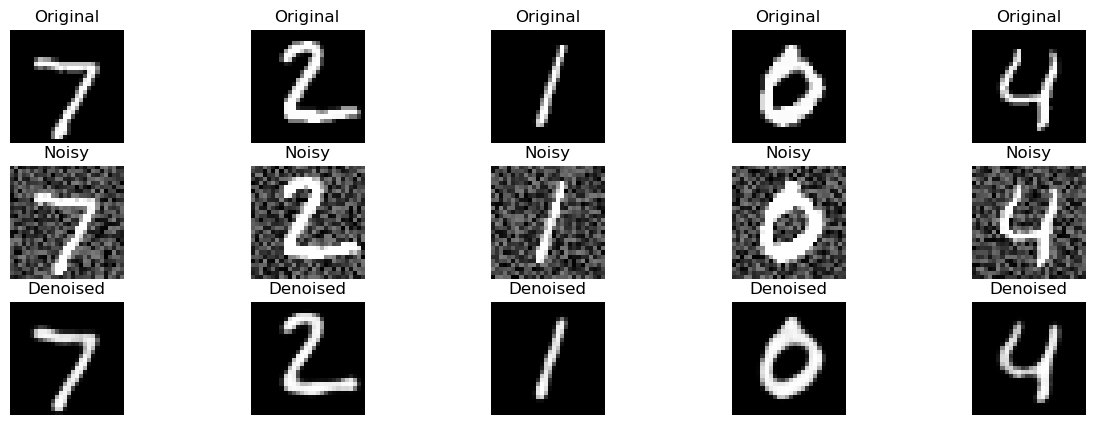

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

with np.load(r"C:\Downloads\mnist.npz\mnist.npz") as data:
    x_train = data['x_train']
    x_test = data['x_test']

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add channel dimension (for grayscale)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.rand(*x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.rand(*x_test.shape)

# Clip values to keep them valid (0–1)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#Build the Denoising Autoencoder
input_img = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Model
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

history = autoencoder.fit(
    x_train_noisy, x_train,
    epochs=2,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

denoised_imgs = autoencoder.predict(x_test_noisy)

n = 5  # number of samples to display
plt.figure(figsize=(15, 5))
for i in range(n):
    # Original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Noisy
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Denoised
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Denoised")
    plt.axis('off')

plt.show()